In [26]:
import torch
from phc.utils.torch_ballbot_batch import Ballbot_Batch, BALLBOT_ROTATION_AXIS
from phc.utils.torch_h1_humanoid_batch import Humanoid_Batch, H1_ROTATION_AXIS
dof_pos = torch.zeros((1, 49))
print(dof_pos.shape)
pose_aa_ballbot = torch.cat(
    [
        torch.zeros((1, 4, 3)),
        BALLBOT_ROTATION_AXIS * dof_pos[..., None],
    ],
    axis=1,
)
print(pose_aa_ballbot)
print(pose_aa_ballbot.shape)

torch.Size([1, 49])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [6]:
print(pose_aa_ballbot[None,].shape)

torch.Size([1, 1, 12, 3])


In [3]:
dof_pos = torch.zeros((1, 19))
pose_aa_h1 = torch.cat(
    [
        torch.zeros((1, 1, 3)),
        H1_ROTATION_AXIS * dof_pos[..., None],
        torch.zeros((1, 2, 3)),
    ],
    axis=1,
)
print(pose_aa_h1)
print(pose_aa_h1.shape)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([1, 22, 3])


In [21]:
from scipy.spatial.transform import Rotation as sRot
import numpy as np
def euler_to_quat(euler):
    quat = sRot.from_euler("XYZ", euler, degrees=False).as_quat()
    # scalar first
    quat = np.concatenate([quat[3:], quat[:3]])
    return quat

In [22]:
euler = [1.5707963267948966, 5.551117636150458e-17, 3.14159265349485]
print(euler_to_quat(euler))

[ 3.35675014e-11  3.35675406e-11 -7.07106781e-01  7.07106781e-01]


In [42]:
import mujoco
import mujoco.viewer
from mujoco import MjModel, MjData


model = MjModel.from_xml_path("resources/robots/ballbot/ballbot.xml")
data = MjData(model)

# body
print("Bodies:")
print(f"Number of bodies: {model.nbody}")
for i in range(model.nbody):
    name = mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_BODY, i)
    print(f"[{i}] {name}")

# joint
print("Joints:")
print(f"Number of joints: {model.njnt}")
for i in range(model.njnt):
    name = mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_JOINT, i)
    print(f"[{i}] {name}")

Bodies:
Number of bodies: 47
[0] world
[1] base_link
[2] torso_link
[3] left_shoulder_pitch_link
[4] left_shoulder_roll_link
[5] left_shoulder_yaw_link
[6] left_elbow_link
[7] right_shoulder_pitch_link
[8] right_shoulder_roll_link
[9] right_shoulder_yaw_link
[10] right_elbow_link
[11] neck_link
[12] head_link
[13] wheel_base_1_link
[14] small_roller_1_1_link
[15] large_roller_1_1_link
[16] small_roller_1_2_link
[17] large_roller_1_2_link
[18] small_roller_1_3_link
[19] large_roller_1_3_link
[20] small_roller_1_4_link
[21] large_roller_1_4_link
[22] small_roller_1_5_link
[23] large_roller_1_5_link
[24] wheel_base_2_link
[25] small_roller_2_1_link
[26] large_roller_2_1_link
[27] small_roller_2_2_link
[28] large_roller_2_2_link
[29] small_roller_2_3_link
[30] large_roller_2_3_link
[31] small_roller_2_4_link
[32] large_roller_2_4_link
[33] small_roller_2_5_link
[34] large_roller_2_5_link
[35] wheel_base_3_link
[36] small_roller_3_1_link
[37] large_roller_3_1_link
[38] small_roller_3_2_link

In [43]:
mujoco.viewer.launch_passive(model, data)

In [36]:
model = MjModel.from_xml_path("resources/robots/h1/h1.xml")
data = MjData(model)

for i in range(model.njnt):
    name = mujoco.mj_id2name(model, mujoco.mjtObj.mjOBJ_JOINT, i)
    print(f"[{i}] {name}")

[0] floating_base_joint
[1] left_hip_yaw_joint
[2] left_hip_roll_joint
[3] left_hip_pitch_joint
[4] left_knee_joint
[5] left_ankle_joint
[6] right_hip_yaw_joint
[7] right_hip_roll_joint
[8] right_hip_pitch_joint
[9] right_knee_joint
[10] right_ankle_joint
[11] torso_joint
[12] left_shoulder_pitch_joint
[13] left_shoulder_roll_joint
[14] left_shoulder_yaw_joint
[15] left_elbow_joint
[16] right_shoulder_pitch_joint
[17] right_shoulder_roll_joint
[18] right_shoulder_yaw_joint
[19] right_elbow_joint


In [4]:
mujoco.viewer.launch_passive(model, data)

In [71]:
import joblib

motion_file_path = "data/ballbot/test.pkl"
motions = joblib.load(motion_file_path)
num_motions = len(motions)
print(f"Number of motions loaded: {num_motions}")
print(f"Loaded {len(motions)} motions from {motion_file_path}")
for i, key in enumerate(motions.keys()):
    print(f"Motion {i}: {key}")

Number of motions loaded: 1
Loaded 1 motions from data/ballbot/test.pkl
Motion 0: 0-KIT_291_punching03_poses


In [57]:
# get first motion of motions
motion = motions["0-KIT_291_punching03_poses"]

for key in motion.keys():
    print(f"{key}: {motion[key].shape if hasattr(motion[key], 'shape') else type(motion[key])}")

root_trans_offset: (385, 3)
pose_aa: (385, 48, 3)
dof: (385, 10)
root_rot: (385, 4)
fps: <class 'int'>


In [58]:
root_trans_offset = motion["root_trans_offset"].copy()
pose_aa = motion["pose_aa"].copy()
dof = motion["dof"].copy()
root_rot = motion["root_rot"].copy()

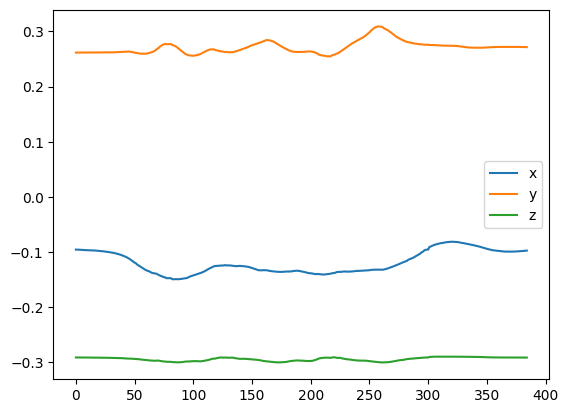

In [62]:
import matplotlib.pyplot as plt

plt.plot(root_trans_offset)
plt.legend(['x', 'y', 'z'])

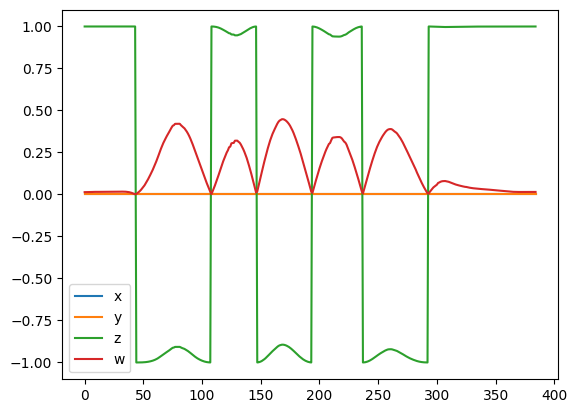

In [61]:
plt.plot(root_rot)
plt.legend(['x', 'y', 'z', 'w'])

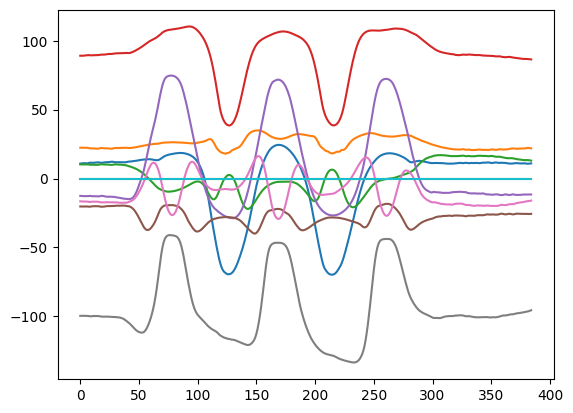

In [68]:
def rad2angle(rad):
    angle = rad.copy()
    angle[angle > np.pi] -= 2 * np.pi
    angle[angle < -np.pi] += 2 * np.pi
    
    angle = angle * 180 / np.pi
    return angle

dof_angle = rad2angle(dof)

plt.plot(dof_angle)